In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [2]:
spam_df = pd.read_csv('spam.csv', encoding='latin-1')
spam_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# Convert labels to binary format: 1 for spam, 0 for ham
spam_df_cleaned = spam_df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
spam_df_cleaned['label'] = spam_df_cleaned['label'].map({'spam': 1, 'ham': 0})
spam_df_cleaned

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [4]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
vectorizer 

TfidfVectorizer(max_features=3000, stop_words='english')

In [5]:
# Fit and transform the message column to create numerical feature matrix
X = vectorizer.fit_transform(spam_df_cleaned['message'])
y = spam_df_cleaned['label']

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9820627802690582
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



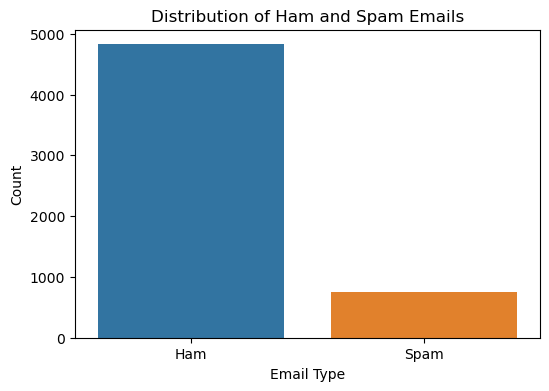

In [10]:
# Visualize the class distribution (ham vs spam)
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=spam_df_cleaned)
plt.title('Distribution of Ham and Spam Emails')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()